In [127]:
#BIOF309 FINAL PROJECT CAROLINE GRANT
import numpy as np # for mathematical equations
import pandas as pd # to process and read in csv data
import matplotlib.pyplot as plt # to visualize data
import matplotlib.image as mpimg
import plotly #to visualize data
plotly.tools.set_credentials_file(username='carolinegrant2016', api_key='b8YWUEWiUjTef2i3IXPe')
dataset = pd.read_csv("drug_induced_deaths_1999-2015.csv")

In [128]:
#visualize a small portion of the data 
dataset.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
0,Alabama,1999,195,4430141,4.4,3.8,5.0,0.3
1,Alabama,2000,232,4447100,5.2,4.5,5.9,0.3
2,Alabama,2001,253,4467634,5.7,5.0,6.4,0.4
3,Alabama,2002,248,4480089,5.5,4.8,6.2,0.4
4,Alabama,2003,255,4503491,5.7,5.0,6.4,0.4


In [139]:
dataset.describe()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
count,867,867,867,867,867,867,867,867
unique,51,17,631,867,216,211,226,20
top,District of Columbia,2015,85,952692,12.6,10.6,8.0,0.5
freq,17,51,7,1,12,17,12,162


In [129]:
#put columns into string format
for col in dataset.columns:
    dataset[col] = dataset[col].astype(str)

In [130]:
#determine the color scheme
color_scale = [[4.0, 'rgb(242,240,247)'],[5.0, 'rgb(218,218,235)'],[6.0, 'rgb(188,189,220)'],\
            [7.0, 'rgb(158,154,200)'],[8.0, 'rgb(117,107,177)'],[9.0, 'rgb(84,39,143)']]

In [131]:
#set the index to be the 'Year' column
dataset_year = dataset.set_index('Year')

In [132]:
dataset_year.head()

,State,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
Year,,,,,,,
1999,Alabama,195,4430141,4.4,3.8,5.0,0.3
2000,Alabama,232,4447100,5.2,4.5,5.9,0.3
2001,Alabama,253,4467634,5.7,5.0,6.4,0.4
2002,Alabama,248,4480089,5.5,4.8,6.2,0.4
2003,Alabama,255,4503491,5.7,5.0,6.4,0.4


In [133]:
#select only the 2015 data
year_2015 = dataset_year.loc['2015']

In [134]:
#visualize sliced dataframe
year_2015.head()

,State,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
Year,,,,,,,
2015,Alabama,810,4858979,16.7,15.5,17.8,0.6
2015,Alaska,127,738432,17.2,14.2,20.2,1.5
2015,Arizona,1351,6828065,19.8,18.7,20.8,0.5
2015,Arkansas,425,2978204,14.3,12.9,15.6,0.7
2015,California,5025,39144818,12.8,12.5,13.2,0.2


In [135]:
year_2015_text = year_2015['Crude Rate']

In [136]:
#specify the data and format of the map
data = [ dict(
        type='choropleth',
        colorscale = color_scale,
        autocolorscale = False,
        locations = year_2015['State'],
        z = year_2015['Crude Rate'].astype(float),
        locationmode = 'USA-states',
        text = year_2015_text,
        marker = dict(
            line = dict (
                color = 'rgb(300,300,255)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = "Crude Death Rate")
        ) ]

In [137]:
#Name the map and specify features
layout = dict(
        title = '2015 US Crime Rates',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

In [138]:
fig = dict( data=data, layout=layout )
py.plot(fig, account='carolinegrant2016')

'https://plot.ly/~carolinegrant2016/16'

In [75]:
df_chi = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
df_chi.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [77]:
df_chi.set_index('Date')

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
05/03/2016 10:35:00 PM,1108,10508702,HZ250447,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
05/03/2016 10:30:00 PM,1130,10508703,HZ250489,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
05/03/2016 09:30:00 PM,1801,10508704,HZ250514,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
05/03/2016 04:00:00 PM,1868,10508709,HZ250523,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"


In [78]:
df_chi.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1.456714e+06,1.456714e+06,1.456714e+06,1.456713e+06,1.456700e+06,1.456674e+06,1.419631e+06,1.419631e+06,1.456714e+06,1.419631e+06,1.419631e+06
mean,3.308606e+06,9.597550e+06,1.150644e+03,1.125920e+01,2.287027e+01,3.745632e+01,1.164398e+06,1.885523e+06,2.013897e+03,4.184147e+01,-8.767224e+01
std,1.235350e+06,8.083505e+05,6.916466e+02,6.904691e+00,1.380589e+01,2.144029e+01,1.850835e+04,3.424775e+04,1.449584e+00,9.430126e-02,6.661726e-02
min,3.000000e+00,2.022400e+04,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.698636e+06,9.002709e+06,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152544e+06,1.858762e+06,2.013000e+03,4.176787e+01,-8.771528e+01
50%,3.063654e+06,9.605776e+06,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166021e+06,1.891502e+06,2.014000e+03,4.185797e+01,-8.766613e+01
75%,3.428849e+06,1.022577e+07,1.711000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176363e+06,1.908713e+06,2.015000e+03,4.190529e+01,-8.762813e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.017000e+03,4.202271e+01,-8.752453e+01


In [82]:
df_chi.loc[:, "Primary Type"]

0                             BATTERY
1                             BATTERY
2              PUBLIC PEACE VIOLATION
3                             BATTERY
4                               THEFT
5                             BATTERY
6                             BATTERY
7                             BATTERY
8                             BATTERY
9                             BATTERY
10                  WEAPONS VIOLATION
11                            BATTERY
12                              THEFT
13                              THEFT
14                              THEFT
15                            BATTERY
16                              THEFT
17                            ROBBERY
18                MOTOR VEHICLE THEFT
19                            BATTERY
20                            ASSAULT
21                            ASSAULT
22                              THEFT
23                              THEFT
24                      OTHER OFFENSE
25                              THEFT
26          

In [83]:
df_chi.loc[:, "Primary Type"] == 'NARCOTICS'

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1456684    False
1456685     True
1456686    False
1456687    False
1456688    False
1456689    False
1456690    False
1456691    False
1456692    False
1456693    False
1456694    False
1456695    False
1456696    False
1456697    False
1456698    False
1456699    False
1456700    False
1456701    False
1456702    False
1456703    False
1456704    False
1456705    False
1456706    False
1456707    False
1456708    False
1456709    False
1456710    False
1456711    Fal

In [84]:
df_narc = df_chi.loc[:, "Primary Type"] == 'NARCOTICS'

In [85]:
df_chi[df_narc]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
140,32450,10509515,HZ251054,05/04/2016 12:50:00 PM,004XX W 97TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,21.0,73.0,18,1174958.0,1840580.0,2016,05/11/2016 03:50:55 PM,41.717933,-87.634796,"(41.717933377, -87.634796373)"
181,44256,10508668,HZ250525,05/04/2016 12:15:00 AM,033XX W FLOURNOY ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,...,24.0,27.0,18,1154249.0,1896836.0,2016,05/11/2016 03:50:55 PM,41.872744,-87.709150,"(41.87274397, -87.709149899)"
182,44300,10508673,HZ250533,05/04/2016 12:14:00 AM,032XX W 47TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,14.0,58.0,18,1155749.0,1873296.0,2016,05/11/2016 03:50:55 PM,41.808117,-87.704276,"(41.808117346, -87.704275674)"
284,77027,10509099,HZ250779,05/04/2016 09:03:00 AM,003XX N CENTRAL AVE,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,SIDEWALK,True,...,28.0,25.0,18,1138983.0,1901704.0,2016,05/11/2016 03:50:55 PM,41.886393,-87.765081,"(41.886393351, -87.765080772)"
285,77180,10509106,HZ250804,05/04/2016 09:40:00 AM,055XX W CORCORAN PL,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,...,28.0,25.0,18,1139214.0,1902011.0,2016,05/11/2016 03:50:55 PM,41.887232,-87.764225,"(41.887231597, -87.764224994)"
306,82076,10509244,HZ250892,05/04/2016 10:45:00 AM,056XX W CHICAGO AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,...,29.0,25.0,18,1138436.0,1904775.0,2016,05/11/2016 03:50:55 PM,41.894830,-87.767015,"(41.894830486, -87.767015087)"
310,82838,10509261,HZ250820,05/04/2016 09:52:00 AM,045XX N BROADWAY,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,46.0,3.0,18,1168225.0,1930362.0,2016,05/11/2016 03:50:55 PM,41.964451,-87.656867,"(41.964450845, -87.656866766)"
315,86464,10509297,HZ250914,05/04/2016 10:58:00 AM,083XX S COMMERCIAL AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,...,10.0,46.0,18,1197636.0,1850405.0,2016,05/11/2016 03:50:55 PM,41.744359,-87.551410,"(41.74435904, -87.551410154)"
326,88104,10509356,HZ250940,05/04/2016 11:20:00 AM,054XX S STATE ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,...,3.0,40.0,18,1177199.0,1868999.0,2016,05/11/2016 03:50:55 PM,41.795868,-87.625732,"(41.795868205, -87.625732367)"
330,89196,10509366,HZ250995,05/04/2016 11:30:00 AM,055XX W QUINCY ST,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,STREET,True,...,29.0,25.0,18,1139594.0,1898454.0,2016,05/11/2016 03:50:55 PM,41.877464,-87.762916,"(41.877463808, -87.762916325)"


In [89]:
df_heroin = (df_chi[df_narc]).loc[:, "Description"] == 'POSS: HEROIN(WHITE)'
df_heroin

140        False
181        False
182        False
284        False
285        False
306        False
310        False
315        False
326        False
330        False
336        False
337        False
345        False
358         True
360        False
361        False
366        False
377        False
378         True
383        False
385         True
387        False
397        False
398        False
401        False
418        False
424        False
426        False
462        False
468         True
           ...  
1455889    False
1455890    False
1455891    False
1455966    False
1455970    False
1455988    False
1455995    False
1455997     True
1456013     True
1456017     True
1456048    False
1456065    False
1456081    False
1456090    False
1456094    False
1456105     True
1456109     True
1456120    False
1456234     True
1456236    False
1456246     True
1456247    False
1456250    False
1456293     True
1456314    False
1456352    False
1456656    False
1456664    Fal

In [90]:
df_chi[df_narc][df_heroin]

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
358,98537,10509721,HZ251150,05/04/2016 01:47:00 PM,044XX W WASHINGTON BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,...,28.0,26.0,18,1146878.0,1900128.0,2016,05/11/2016 03:50:55 PM,41.881922,-87.736128,"(41.881921503, -87.736128367)"
378,104354,10509776,HZ251156,05/04/2016 02:19:00 PM,030XX N PULASKI RD,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,...,31.0,21.0,18,1149198.0,1919884.0,2016,05/11/2016 03:50:55 PM,41.936089,-87.727097,"(41.936089289, -87.727096561)"
385,106353,10509794,HZ251154,05/04/2016 01:35:00 PM,027XX W MADISON ST,2024,NARCOTICS,POSS: HEROIN(WHITE),PARKING LOT/GARAGE(NON.RESID.),True,...,2.0,27.0,18,1158054.0,1899904.0,2016,05/11/2016 03:50:55 PM,41.881086,-87.695096,"(41.881086082, -87.695096188)"
468,128361,10509975,HZ251569,05/04/2016 07:10:00 PM,039XX W GRENSHAW ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,24.0,29.0,18,1150335.0,1894751.0,2016,05/11/2016 03:50:55 PM,41.867100,-87.723574,"(41.867099694, -87.723574471)"
589,162921,10510209,HZ251788,05/04/2016 10:42:00 PM,037XX W HARRISON ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,24.0,27.0,18,1151705.0,1897101.0,2016,05/11/2016 03:50:55 PM,41.873522,-87.718483,"(41.873521544, -87.718483183)"
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,20.0,42.0,18,1181623.0,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)"
759,210920,10212757,HY369072,08/04/2015 04:51:00 PM,007XX S KEDVALE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,...,24.0,26.0,18,1148838.0,1896308.0,2015,05/12/2016 03:48:29 PM,41.871401,-87.729030,"(41.871401333, -87.729029971)"
769,213970,10214340,HY373225,08/07/2015 05:53:42 PM,012XX S FAIRFIELD AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,...,28.0,29.0,18,1158231.0,1894123.0,2015,05/12/2016 03:48:29 PM,41.865219,-87.694604,"(41.865218836, -87.694604216)"
773,214667,10218922,HY234127,04/24/2015 11:50:00 AM,071XX S ASHLAND AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,17.0,67.0,18,1166924.0,1857157.0,2015,05/12/2016 03:48:29 PM,41.763598,-87.663749,"(41.763598176, -87.663749413)"
784,216821,10228811,HY233445,04/23/2015 04:49:27 PM,072XX S PHILLIPS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,7.0,43.0,18,1193762.0,1857383.0,2015,05/12/2016 03:48:29 PM,41.763603,-87.565376,"(41.763602949, -87.565376421)"


In [91]:
df_HER = df_chi[df_narc][df_heroin]

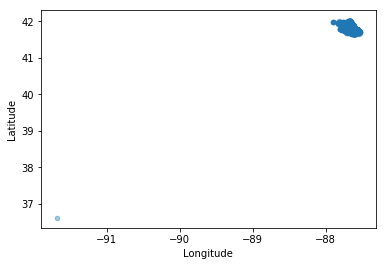

In [93]:
df_HER.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

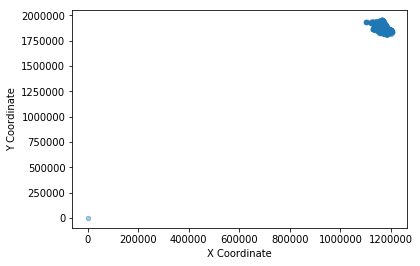

In [94]:
df_HER.plot(kind="scatter", x="X Coordinate", y="Y Coordinate", alpha=0.4)
plt.show()

In [96]:
filt_df_HER = df_HER[df_HER['Longitude'].notnull()]
filt_df_HER

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
358,98537,10509721,HZ251150,05/04/2016 01:47:00 PM,044XX W WASHINGTON BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,...,28.0,26.0,18,1146878.0,1900128.0,2016,05/11/2016 03:50:55 PM,41.881922,-87.736128,"(41.881921503, -87.736128367)"
378,104354,10509776,HZ251156,05/04/2016 02:19:00 PM,030XX N PULASKI RD,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,...,31.0,21.0,18,1149198.0,1919884.0,2016,05/11/2016 03:50:55 PM,41.936089,-87.727097,"(41.936089289, -87.727096561)"
385,106353,10509794,HZ251154,05/04/2016 01:35:00 PM,027XX W MADISON ST,2024,NARCOTICS,POSS: HEROIN(WHITE),PARKING LOT/GARAGE(NON.RESID.),True,...,2.0,27.0,18,1158054.0,1899904.0,2016,05/11/2016 03:50:55 PM,41.881086,-87.695096,"(41.881086082, -87.695096188)"
468,128361,10509975,HZ251569,05/04/2016 07:10:00 PM,039XX W GRENSHAW ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,24.0,29.0,18,1150335.0,1894751.0,2016,05/11/2016 03:50:55 PM,41.867100,-87.723574,"(41.867099694, -87.723574471)"
589,162921,10510209,HZ251788,05/04/2016 10:42:00 PM,037XX W HARRISON ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,24.0,27.0,18,1151705.0,1897101.0,2016,05/11/2016 03:50:55 PM,41.873522,-87.718483,"(41.873521544, -87.718483183)"
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,20.0,42.0,18,1181623.0,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)"
759,210920,10212757,HY369072,08/04/2015 04:51:00 PM,007XX S KEDVALE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,...,24.0,26.0,18,1148838.0,1896308.0,2015,05/12/2016 03:48:29 PM,41.871401,-87.729030,"(41.871401333, -87.729029971)"
769,213970,10214340,HY373225,08/07/2015 05:53:42 PM,012XX S FAIRFIELD AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,...,28.0,29.0,18,1158231.0,1894123.0,2015,05/12/2016 03:48:29 PM,41.865219,-87.694604,"(41.865218836, -87.694604216)"
773,214667,10218922,HY234127,04/24/2015 11:50:00 AM,071XX S ASHLAND AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,17.0,67.0,18,1166924.0,1857157.0,2015,05/12/2016 03:48:29 PM,41.763598,-87.663749,"(41.763598176, -87.663749413)"
784,216821,10228811,HY233445,04/23/2015 04:49:27 PM,072XX S PHILLIPS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,7.0,43.0,18,1193762.0,1857383.0,2015,05/12/2016 03:48:29 PM,41.763603,-87.565376,"(41.763602949, -87.565376421)"


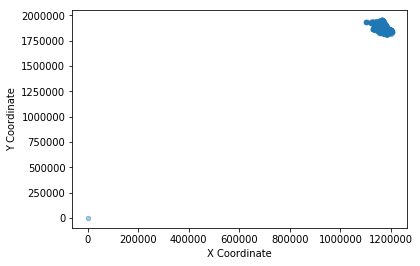

In [97]:
filt_df_HER.plot(kind="scatter", x="X Coordinate", y="Y Coordinate", alpha=0.4)
plt.show()

In [100]:
df_final = filt_df_HER[filt_df_HER['Latitude'] > 37]
df_final

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
358,98537,10509721,HZ251150,05/04/2016 01:47:00 PM,044XX W WASHINGTON BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,...,28.0,26.0,18,1146878.0,1900128.0,2016,05/11/2016 03:50:55 PM,41.881922,-87.736128,"(41.881921503, -87.736128367)"
378,104354,10509776,HZ251156,05/04/2016 02:19:00 PM,030XX N PULASKI RD,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,...,31.0,21.0,18,1149198.0,1919884.0,2016,05/11/2016 03:50:55 PM,41.936089,-87.727097,"(41.936089289, -87.727096561)"
385,106353,10509794,HZ251154,05/04/2016 01:35:00 PM,027XX W MADISON ST,2024,NARCOTICS,POSS: HEROIN(WHITE),PARKING LOT/GARAGE(NON.RESID.),True,...,2.0,27.0,18,1158054.0,1899904.0,2016,05/11/2016 03:50:55 PM,41.881086,-87.695096,"(41.881086082, -87.695096188)"
468,128361,10509975,HZ251569,05/04/2016 07:10:00 PM,039XX W GRENSHAW ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,24.0,29.0,18,1150335.0,1894751.0,2016,05/11/2016 03:50:55 PM,41.867100,-87.723574,"(41.867099694, -87.723574471)"
589,162921,10510209,HZ251788,05/04/2016 10:42:00 PM,037XX W HARRISON ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,24.0,27.0,18,1151705.0,1897101.0,2016,05/11/2016 03:50:55 PM,41.873522,-87.718483,"(41.873521544, -87.718483183)"
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,20.0,42.0,18,1181623.0,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)"
759,210920,10212757,HY369072,08/04/2015 04:51:00 PM,007XX S KEDVALE AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,...,24.0,26.0,18,1148838.0,1896308.0,2015,05/12/2016 03:48:29 PM,41.871401,-87.729030,"(41.871401333, -87.729029971)"
769,213970,10214340,HY373225,08/07/2015 05:53:42 PM,012XX S FAIRFIELD AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),APARTMENT,True,...,28.0,29.0,18,1158231.0,1894123.0,2015,05/12/2016 03:48:29 PM,41.865219,-87.694604,"(41.865218836, -87.694604216)"
773,214667,10218922,HY234127,04/24/2015 11:50:00 AM,071XX S ASHLAND AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,...,17.0,67.0,18,1166924.0,1857157.0,2015,05/12/2016 03:48:29 PM,41.763598,-87.663749,"(41.763598176, -87.663749413)"
784,216821,10228811,HY233445,04/23/2015 04:49:27 PM,072XX S PHILLIPS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,7.0,43.0,18,1193762.0,1857383.0,2015,05/12/2016 03:48:29 PM,41.763603,-87.565376,"(41.763602949, -87.565376421)"


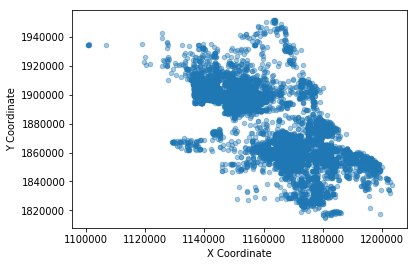

In [101]:
df_final.plot(kind="scatter", x="X Coordinate", y="Y Coordinate", alpha=0.4)
plt.show()

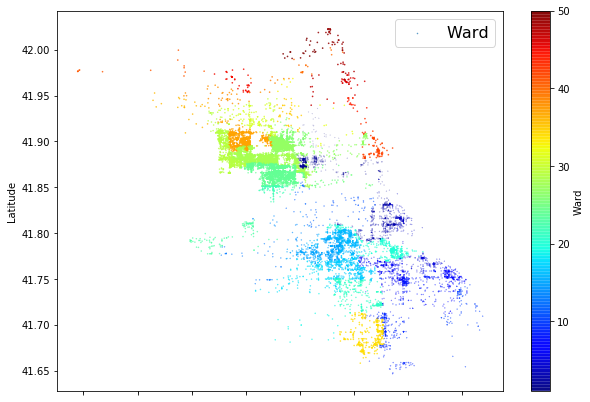

In [141]:
chi_ward = df_final.plot(kind="scatter", x="Longitude", y="Latitude",
            s=df_final['Ward']/100, label="Ward",
            c="Ward", cmap=plt.get_cmap("jet"),
            colorbar=True, alpha=0.8, figsize=(10,7),
            )
plt.legend(fontsize=16)
plt.show()